In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from matplotlib.ticker import NullFormatter

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [3]:
# NIVELL 1
# - Exercici 1
# Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [4]:
# NIVELL 2
# - Exercici 2
# Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [5]:
mcabecera = ['movie_id', 'titulo', 'genero']
mcabecera

['movie_id', 'titulo', 'genero']

In [6]:
movies = pd.read_table('movies.dat', sep = '::', header = None, names = mcabecera)
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.shape

(3883, 3)

In [8]:
movies.ndim

2

In [9]:
movies.columns

Index(['movie_id', 'titulo', 'genero'], dtype='object')

In [10]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [11]:
todos_generos = []
todos_generos

[]

In [12]:
#el built in 'split' ens permet separar l'string en una llista segons el parametre que li donem, en aquest cas '|'.

for x in movies.genero:
    todos_generos.extend(x.split('|'))

In [13]:
todos_generos

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [14]:
len(todos_generos)

6408

In [15]:
generos = pd.unique(todos_generos)
generos

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [16]:
len(generos)

18

In [17]:
#dummy
len(movies)

3883

In [18]:
cero_matriz = np.zeros((len(movies), len(generos)))
cero_matriz.shape

(3883, 18)

In [19]:
cero_matriz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
dummies = pd.DataFrame(cero_matriz, columns = generos)
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dummies.sum()

Animation      0.0
Children's     0.0
Comedy         0.0
Adventure      0.0
Fantasy        0.0
Romance        0.0
Drama          0.0
Action         0.0
Crime          0.0
Thriller       0.0
Horror         0.0
Sci-Fi         0.0
Documentary    0.0
War            0.0
Musical        0.0
Mystery        0.0
Film-Noir      0.0
Western        0.0
dtype: float64

In [22]:
dummies.describe()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0,3883.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
dummies.columns

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [24]:
gen = movies.genero[0]
gen

"Animation|Children's|Comedy"

In [25]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [26]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [27]:
for i, gen in enumerate(movies.genero):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [28]:
movies_dummies = movies.join(dummies.add_prefix('Genero_'))
movies_dummies.head()

,movie_id,titulo,genero,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
todos_titulos = []
todos_titulos

[]

In [30]:
for x in movies.titulo:
    todos_titulos.extend(x.rsplit(' ', 1))

In [31]:
todos_titulos

['Toy Story',
 '(1995)',
 'Jumanji',
 '(1995)',
 'Grumpier Old Men',
 '(1995)',
 'Waiting to Exhale',
 '(1995)',
 'Father of the Bride Part II',
 '(1995)',
 'Heat',
 '(1995)',
 'Sabrina',
 '(1995)',
 'Tom and Huck',
 '(1995)',
 'Sudden Death',
 '(1995)',
 'GoldenEye',
 '(1995)',
 'American President, The',
 '(1995)',
 'Dracula: Dead and Loving It',
 '(1995)',
 'Balto',
 '(1995)',
 'Nixon',
 '(1995)',
 'Cutthroat Island',
 '(1995)',
 'Casino',
 '(1995)',
 'Sense and Sensibility',
 '(1995)',
 'Four Rooms',
 '(1995)',
 'Ace Ventura: When Nature Calls',
 '(1995)',
 'Money Train',
 '(1995)',
 'Get Shorty',
 '(1995)',
 'Copycat',
 '(1995)',
 'Assassins',
 '(1995)',
 'Powder',
 '(1995)',
 'Leaving Las Vegas',
 '(1995)',
 'Othello',
 '(1995)',
 'Now and Then',
 '(1995)',
 'Persuasion',
 '(1995)',
 'City of Lost Children, The',
 '(1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao)',
 '(1995)',
 'Dangerous Minds',
 '(1995)',
 'Twelve Monkeys',
 '(1995)',
 'Wings of Courage',
 '(1995)',
 'Ba

In [32]:
len(todos_titulos)

7766

In [33]:
titulos = todos_titulos[::2]
titulos

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'American President, The',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'City of Lost Children, The',
 'Shanghai Triad (Yao a yao yao dao waipo qiao)',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Wings of Courage',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry, the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How to Make an American Quilt',
 'Seven (Se7en)',
 'Pocahontas',
 'When Night Is Falling',
 'Usual Suspects, The',
 'Guardian Angel',
 'Mighty Aphrod

In [34]:
len(titulos)

3883

In [35]:
años = todos_titulos[1::2]
años

['(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1994)',
 '(1995)',
 '(1994)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1994)',
 '(1995)',
 '(1995)',
 '(1996)',
 '(1995)',
 '(1996)',
 '(1996)',
 '(1996)',
 '(1996)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1996)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1996)',
 '(1996)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1996)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1995)',
 '(1996)',
 '(1996)',
 '(1996)',
 '(1995)',
 '(1995)',
 '(1996)',

In [36]:
len(años)

3883

In [37]:
cero_matriz = np.zeros((len(movies), len(años)))
cero_matriz.shape

(3883, 3883)

In [38]:
movies['Año'] = años
movies.head(3)

,movie_id,titulo,genero,Año
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)


In [39]:
movies['Titulo'] = titulos
movies.head(3)

,movie_id,titulo,genero,Año,Titulo
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995),Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995),Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995),Grumpier Old Men


In [40]:
movies = movies[['movie_id','Titulo', 'Año', 'genero']]
movies.head(3)

,movie_id,Titulo,Año,genero
0,1,Toy Story,(1995),Animation|Children's|Comedy
1,2,Jumanji,(1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men,(1995),Comedy|Romance


In [41]:
movies_dummies.insert(1, 'Titulo', titulos)
movies_dummies.head(5)

,movie_id,Titulo,titulo,genero,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
movies_dummies.insert(2, 'Año', años)
movies_dummies.head(5)

,movie_id,Titulo,Año,titulo,genero,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,(1995),Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,(1995),Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,(1995),Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,(1995),Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,(1995),Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
movies = movies_dummies
movies

,movie_id,Titulo,Año,titulo,genero,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,(1995),Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,(1995),Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,(1995),Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,(1995),Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,(1995),Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,(2000),Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream,(2000),Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland,(2000),Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House,(2000),Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
movies = movies.drop(columns = ['titulo', 'genero'])
movies.head(5)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,(1995),1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,(1995),0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,(1995),0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,(1995),0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,(1995),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
movies.columns

Index(['movie_id', 'Titulo', 'Año', 'Genero_Animation', 'Genero_Children's',
       'Genero_Comedy', 'Genero_Adventure', 'Genero_Fantasy', 'Genero_Romance',
       'Genero_Drama', 'Genero_Action', 'Genero_Crime', 'Genero_Thriller',
       'Genero_Horror', 'Genero_Sci-Fi', 'Genero_Documentary', 'Genero_War',
       'Genero_Musical', 'Genero_Mystery', 'Genero_Film-Noir',
       'Genero_Western'],
      dtype='object')

In [46]:
movies.ndim

2

In [47]:
round(movies.describe(include='all'), 3)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
count,3883.000,3883,3883,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000,3883.000
unique,NaN,3840,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hamlet,(1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1986.049,NaN,NaN,0.027,0.065,0.309,0.073,0.018,0.121,0.413,0.130,0.054,0.127,0.088,0.071,0.033,0.037,0.029,0.027,0.011,0.018
std,1146.778,NaN,NaN,0.162,0.246,0.462,0.260,0.131,0.327,0.492,0.336,0.227,0.333,0.284,0.257,0.178,0.188,0.169,0.163,0.106,0.131
min,1.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,982.500,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2010.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2980.500,NaN,NaN,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [48]:
movies.Genero_Animation.sum()

105.0

In [49]:
movies['Año'] = años
movies.head(3)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,(1995),1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,(1995),0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,(1995),0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
movies['Año'] = movies['Año'].replace(to_replace='\(', value="", regex=True)
movies['Año'] = movies['Año'].replace(to_replace='\)', value="", regex=True)
movies.head(3)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
movies['Año'].value_counts()

1996             345
1995             342
1998             337
1997             315
1999             283
1994             257
1993             165
2000             156
1986             104
1992             102
1990              77
1987              71
1988              69
1985              65
1991              60
1984              60
1989              60
1982              49
1981              43
1980              41
1983              35
1979              32
1978              30
1973              29
1974              28
1971              26
1963              25
1967              24
1968              22
1959              22
1977              22
1958              22
1972              22
1975              21
1976              21
1962              20
1957              20
1965              20
1955              19
1956              19
1961              19
1940              19
1969              18
1970              16
1964              16
1954              15
1960              15
1950         

In [52]:
 movies.dtypes

movie_id                int64
Titulo                 object
Año                    object
Genero_Animation      float64
Genero_Children's     float64
Genero_Comedy         float64
Genero_Adventure      float64
Genero_Fantasy        float64
Genero_Romance        float64
Genero_Drama          float64
Genero_Action         float64
Genero_Crime          float64
Genero_Thriller       float64
Genero_Horror         float64
Genero_Sci-Fi         float64
Genero_Documentary    float64
Genero_War            float64
Genero_Musical        float64
Genero_Mystery        float64
Genero_Film-Noir      float64
Genero_Western        float64
dtype: object

In [53]:
# Veiem que hi ha un valor diferent a la resta ( "L'Associe1982")
movies['Año'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe1982",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '1927', '1929', '1928', '1925', '1923', '1999', '1919',
       '2000', '1920', '1921'], dtype=object)

In [54]:
#El modifiquem i passem tota la columna a float values
movies['Año'].replace("L'Associe1982", '1982', inplace = True)

In [55]:
movies['Año'] = movies['Año'].astype(float)

In [56]:
# NIVELL 3

# - Exercici 3
# Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.



In [57]:
movies.columns

Index(['movie_id', 'Titulo', 'Año', 'Genero_Animation', 'Genero_Children's',
       'Genero_Comedy', 'Genero_Adventure', 'Genero_Fantasy', 'Genero_Romance',
       'Genero_Drama', 'Genero_Action', 'Genero_Crime', 'Genero_Thriller',
       'Genero_Horror', 'Genero_Sci-Fi', 'Genero_Documentary', 'Genero_War',
       'Genero_Musical', 'Genero_Mystery', 'Genero_Film-Noir',
       'Genero_Western'],
      dtype='object')

In [58]:
# Creem una llista per afegir la suma de pel·lícules per gènere
llista_sum_generes = []
for i in movies.columns[3:]:
    x = (movies[i].sum())
    print(x)
    llista_sum_generes.append(x)

105.0
251.0
1200.0
283.0
68.0
471.0
1603.0
503.0
211.0
492.0
343.0
276.0
127.0
143.0
114.0
106.0
44.0
68.0


In [59]:
print(llista_sum_generes)

[105.0, 251.0, 1200.0, 283.0, 68.0, 471.0, 1603.0, 503.0, 211.0, 492.0, 343.0, 276.0, 127.0, 143.0, 114.0, 106.0, 44.0, 68.0]


In [60]:
# Creem un diccionari per tenir la suma corresponent al gènere, de manera etiquetada
diccionari_sum_generes = {}
contador = 0
for i in movies.columns[3:]:
    diccionari_sum_generes[i] = llista_sum_generes[contador]
    contador+=1
print(diccionari_sum_generes)

{'Genero_Animation': 105.0, "Genero_Children's": 251.0, 'Genero_Comedy': 1200.0, 'Genero_Adventure': 283.0, 'Genero_Fantasy': 68.0, 'Genero_Romance': 471.0, 'Genero_Drama': 1603.0, 'Genero_Action': 503.0, 'Genero_Crime': 211.0, 'Genero_Thriller': 492.0, 'Genero_Horror': 343.0, 'Genero_Sci-Fi': 276.0, 'Genero_Documentary': 127.0, 'Genero_War': 143.0, 'Genero_Musical': 114.0, 'Genero_Mystery': 106.0, 'Genero_Film-Noir': 44.0, 'Genero_Western': 68.0}


In [61]:
diccionari_sum_generes.keys()

dict_keys(['Genero_Animation', "Genero_Children's", 'Genero_Comedy', 'Genero_Adventure', 'Genero_Fantasy', 'Genero_Romance', 'Genero_Drama', 'Genero_Action', 'Genero_Crime', 'Genero_Thriller', 'Genero_Horror', 'Genero_Sci-Fi', 'Genero_Documentary', 'Genero_War', 'Genero_Musical', 'Genero_Mystery', 'Genero_Film-Noir', 'Genero_Western'])

In [62]:
diccionari_sum_generes.values()

dict_values([105.0, 251.0, 1200.0, 283.0, 68.0, 471.0, 1603.0, 503.0, 211.0, 492.0, 343.0, 276.0, 127.0, 143.0, 114.0, 106.0, 44.0, 68.0])

In [63]:
#Passem el diccionari de sumatoris a Series per poder operar amb pandas més comodament i l'ordenem.
df_generes = pd.Series(diccionari_sum_generes)
df_generes = df_generes.sort_values(ascending=False)
df_generes

Genero_Drama          1603.0
Genero_Comedy         1200.0
Genero_Action          503.0
Genero_Thriller        492.0
Genero_Romance         471.0
Genero_Horror          343.0
Genero_Adventure       283.0
Genero_Sci-Fi          276.0
Genero_Children's      251.0
Genero_Crime           211.0
Genero_War             143.0
Genero_Documentary     127.0
Genero_Musical         114.0
Genero_Mystery         106.0
Genero_Animation       105.0
Genero_Fantasy          68.0
Genero_Western          68.0
Genero_Film-Noir        44.0
dtype: float64

In [64]:
df_generes.shape

(18,)

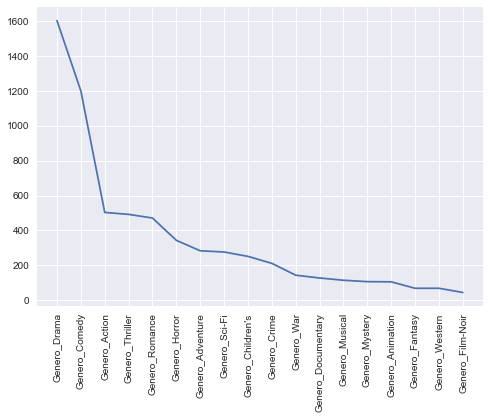

In [65]:
# Fem el primer plot general de les sumes de pel·lícules per gènere, 
# extretes del diccionari que hem creat i passat a pd.series:
plt.style.use("seaborn")
plt.plot(df_generes)

# Rotem els ticks del x axis per tal que no es solapin
plt.xticks(np.arange(len(df_generes)))
plt.xticks(rotation='vertical')

plt.show()

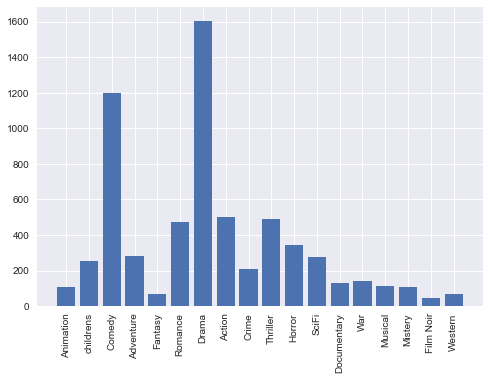

In [66]:
# Segon plot general, passant les keys i els values del diccionari de gèneres com a x i y axis, respectivament:

x = diccionari_sum_generes.keys()
y = diccionari_sum_generes.values()
labels = ['Animation', 'childrens', 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
           'Thriller', 'Horror', 'SciFi', 'Documentary', 'War', 'Musical', 'Mistery', 'Film Noir', 'Western']

tickvalues = range(0,len(x))
plt.bar(x,y)

# Rotem els ticks del x axis per tal que no es solapin
plt.xticks(ticks = tickvalues, labels = labels, rotation='vertical')

plt.show()

In [67]:
type(x)

dict_keys

In [68]:
x = diccionari_sum_generes
a = sorted(x.items(), key=lambda x: x[1], reverse=True)    
print(a)

[('Genero_Drama', 1603.0), ('Genero_Comedy', 1200.0), ('Genero_Action', 503.0), ('Genero_Thriller', 492.0), ('Genero_Romance', 471.0), ('Genero_Horror', 343.0), ('Genero_Adventure', 283.0), ('Genero_Sci-Fi', 276.0), ("Genero_Children's", 251.0), ('Genero_Crime', 211.0), ('Genero_War', 143.0), ('Genero_Documentary', 127.0), ('Genero_Musical', 114.0), ('Genero_Mystery', 106.0), ('Genero_Animation', 105.0), ('Genero_Fantasy', 68.0), ('Genero_Western', 68.0), ('Genero_Film-Noir', 44.0)]


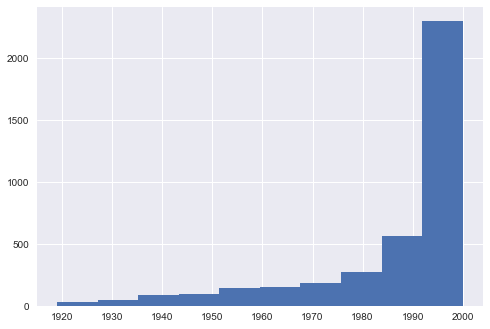

In [69]:
#Histograma del número de pel·lícules i any. Aquest plot agrupa automàticament per dècades:
x = movies['Año']

plt.hist(x)

plt.show()

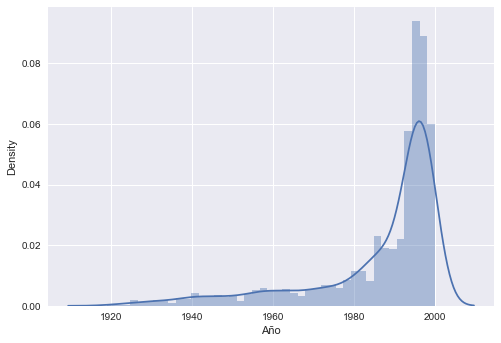

In [70]:
#Distplot de pel·lícules i any
figsize = 3,10
sns.distplot(movies['Año'])
plt.show()

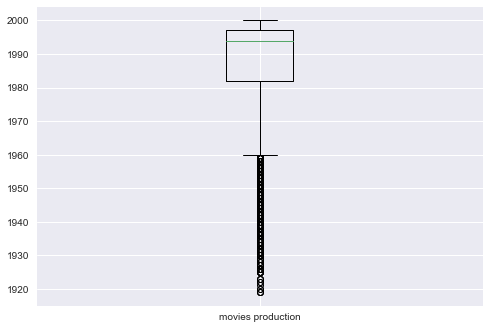

In [71]:
# Fem un primer boxplot de la producció general de pel·lícules.
# Ens servirà més endavant per comparar amb l'evolució de la producció per gèneres.

# Els 4 quartils van del 1960 al 2000, deixant la resta de la producció anterior com a outliers.
x = movies['Año']

label = ['movies production']
plt.boxplot(x, labels = label)

plt.show()

In [72]:
# Apliquem un value_counts() per agrupar la producció per anys:
total = movies['Año'].value_counts()
total

1996.0    345
1995.0    342
1998.0    337
1997.0    315
1999.0    283
1994.0    257
1993.0    165
2000.0    156
1986.0    104
1992.0    102
1990.0     77
1987.0     71
1988.0     69
1985.0     65
1989.0     60
1991.0     60
1984.0     60
1982.0     50
1981.0     43
1980.0     41
1983.0     35
1979.0     32
1978.0     30
1973.0     29
1974.0     28
1971.0     26
1963.0     25
1967.0     24
1959.0     22
1977.0     22
1968.0     22
1958.0     22
1972.0     22
1975.0     21
1976.0     21
1962.0     20
1965.0     20
1957.0     20
1961.0     19
1956.0     19
1955.0     19
1940.0     19
1969.0     18
1970.0     16
1964.0     16
1954.0     15
1960.0     15
1950.0     14
1953.0     14
1947.0     14
1942.0     13
1946.0     13
1944.0     13
1951.0     12
1966.0     12
1948.0     12
1952.0     11
1941.0     11
1939.0     11
1945.0     11
1937.0     11
1949.0     10
1943.0     10
1926.0      8
1936.0      8
1934.0      7
1932.0      7
1930.0      7
1931.0      7
1933.0      7
1927.0      6
1938.0

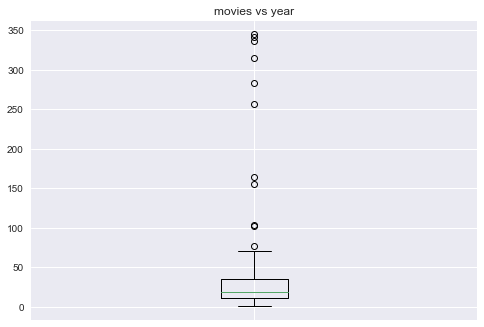

In [73]:
# Boxplot de la producció per anys. 
label = ['']
plt.boxplot(total, labels= label)

plt.title('movies vs year')

plt.show()

# El màxim de pel·lícules produídes en un any són 350 i el mínim 1.
# Per sobre 70 aprox, són outliers.

In [74]:
#Creem un filtre per accedir als registres per dècades. Ho provem primer amb una sola dècada(anys 20):
filt_20 = ((movies['Año']).between(1920, 1929, inclusive=True))

In [75]:
movies.loc[filt_20]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
945,957,"Scarlet Letter, The",1926.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327,1348,"Nosferatu (Nosferatu, eine Symphonie des Grauens)",1922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1856,1925,Wings,1927.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1857,1926,"Broadway Melody, The",1929.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1941,2010,Metropolis,1926.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2151,2220,"Manxman, The",1929.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2152,2221,Blackmail,1929.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2153,2222,Champagne,1928.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,2223,"Farmer's Wife, The",1928.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2155,2224,Downhill,1927.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Obtenim tota la informació de la producció de pel·lícules de la dècada en qüestió:
movies.loc[filt_20,'Genero_Animation':'Genero_Western'].sum()

Genero_Animation       0.0
Genero_Children's      0.0
Genero_Comedy         13.0
Genero_Adventure       1.0
Genero_Fantasy         0.0
Genero_Romance         2.0
Genero_Drama          14.0
Genero_Action          1.0
Genero_Crime           1.0
Genero_Thriller        2.0
Genero_Horror          1.0
Genero_Sci-Fi          1.0
Genero_Documentary     0.0
Genero_War             2.0
Genero_Musical         1.0
Genero_Mystery         0.0
Genero_Film-Noir       0.0
Genero_Western         0.0
dtype: float64

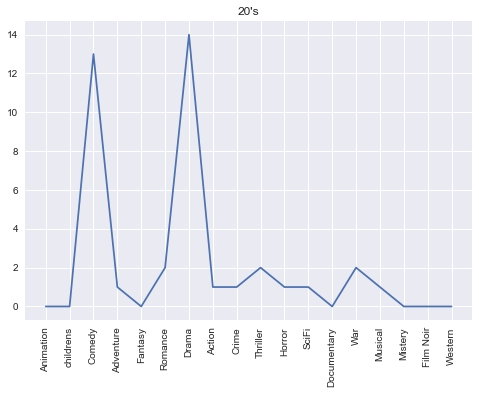

In [77]:
# Mirem de fer el primer plot de la producció per gèneres de la dècada dels anys 20:
x = movies.loc[filt_20,'Genero_Animation':'Genero_Western'].sum()

labels = ['Animation', 'childrens', 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
           'Thriller', 'Horror', 'SciFi', 'Documentary', 'War', 'Musical', 'Mistery', 'Film Noir', 'Western']

plt.plot(x)
y = (np.arange(len(df_generes)))
plt.xticks(y, labels, rotation='vertical')

plt.title("20's")

plt.show()

In [78]:
#Creem un filtre per accedir als registres per dècades. Ho provem primer amb una sola dècada(anys 20):
filt_20 = ((movies['Año']).between(1920, 1929, inclusive=True))

In [79]:
movies.loc[filt_20]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
945,957,"Scarlet Letter, The",1926.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327,1348,"Nosferatu (Nosferatu, eine Symphonie des Grauens)",1922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1856,1925,Wings,1927.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1857,1926,"Broadway Melody, The",1929.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1941,2010,Metropolis,1926.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2151,2220,"Manxman, The",1929.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2152,2221,Blackmail,1929.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2153,2222,Champagne,1928.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,2223,"Farmer's Wife, The",1928.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2155,2224,Downhill,1927.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Creem el que seran les keys del diccionari de filtres de cada dècada:
llista_filts = []
contador = 30
for i in range (0,7):
        x = 'filt_{}'.format(contador)
        print(x)
        contador+=10
        llista_filts.append(x)

filt_30
filt_40
filt_50
filt_60
filt_70
filt_80
filt_90


In [81]:
llista_filts

['filt_30', 'filt_40', 'filt_50', 'filt_60', 'filt_70', 'filt_80', 'filt_90']

In [82]:
# Passem els values, ajuntant keys i values
dict_filtres = {}
x = 1930
y = 1939
for i in llista_filts:
    filt = ((movies['Año']).between(x, y, inclusive=True))
    x +=10
    y +=10
    dict_filtres[i] = filt
    print(i)

filt_30
filt_40
filt_50
filt_60
filt_70
filt_80
filt_90


In [83]:
dict_filtres.keys()

dict_keys(['filt_30', 'filt_40', 'filt_50', 'filt_60', 'filt_70', 'filt_80', 'filt_90'])

In [84]:
dict_filtres['filt_30']

0       False
1       False
2       False
3       False
4       False
        ...  
3878    False
3879    False
3880    False
3881    False
3882    False
Name: Año, Length: 3883, dtype: bool

In [85]:
# Comprovem que segueixi funcionant:
movies.loc[dict_filtres['filt_30']].sum()

movie_id                                                         146857
Titulo                Snow White and the Seven DwarfsLiebeleiIt Happ...
Año                                                            148982.0
Genero_Animation                                                    2.0
Genero_Children's                                                   4.0
Genero_Comedy                                                      23.0
Genero_Adventure                                                    6.0
Genero_Fantasy                                                      0.0
Genero_Romance                                                     15.0
Genero_Drama                                                       26.0
Genero_Action                                                       3.0
Genero_Crime                                                        4.0
Genero_Thriller                                                     9.0
Genero_Horror                                                   

In [86]:
filt_20 = ((movies['Año']).between(1920, 1929, inclusive=True))

In [87]:
# Afegim manualment les dècades dels 20 i dels 2000, que ens falten:
dict_filtres['filt_20'] = ((movies['Año']).between(1920, 1929, inclusive = True))

In [88]:
dict_filtres['filt_00'] = ((movies['Año']).between(2000, 2009, inclusive = True))

In [89]:
dict_filtres.keys()

dict_keys(['filt_30', 'filt_40', 'filt_50', 'filt_60', 'filt_70', 'filt_80', 'filt_90', 'filt_20', 'filt_00'])

In [94]:
movies.loc[dict_filtres['filt_00']]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
3121,3190,Supernova,2000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3156,3225,Down to You,2000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3170,3239,Isn't She Great?,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3204,3273,Scream 3,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3207,3276,Gun Shy,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


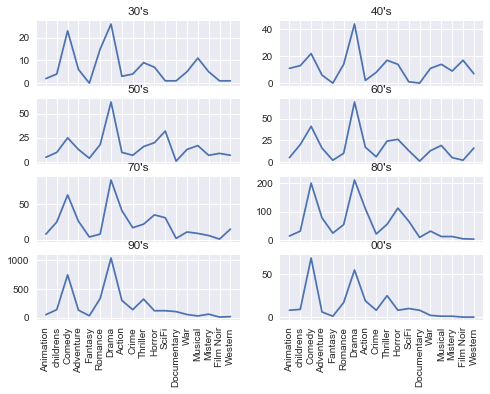

In [96]:
# Fem un subplots per cada una de les dècades, mirant l'evolució de la producció per gèneres:

labels = ['Animation', 'childrens', 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
           'Thriller', 'Horror', 'SciFi', 'Documentary', 'War', 'Musical', 'Mistery', 'Film Noir', 'Western']
fig = plt.figure()

ax1 = fig.add_subplot(4,2,1)
ax1.plot(movies.loc[dict_filtres['filt_30'],'Genero_Animation':'Genero_Western'].sum())
ax1.axes.get_xaxis().set_major_formatter(NullFormatter()) #Borrem les xticks pero mantenim el grid
ax1.set_title("30's")

ax2 = fig.add_subplot(4,2,2)
ax2.plot(movies.loc[dict_filtres['filt_40'],'Genero_Animation':'Genero_Western'].sum())
ax2.axes.get_xaxis().set_major_formatter(NullFormatter())
ax2.set_title("40's")

ax3 = fig.add_subplot(4,2,3)
ax3.plot(movies.loc[dict_filtres['filt_50'],'Genero_Animation':'Genero_Western'].sum())
ax3.axes.get_xaxis().set_major_formatter(NullFormatter())
ax3.set_title("50's")

ax4 = fig.add_subplot(4,2,4)
ax4.plot(movies.loc[dict_filtres['filt_60'],'Genero_Animation':'Genero_Western'].sum())
ax4.axes.get_xaxis().set_major_formatter(NullFormatter())
ax4.set_title("60's")

ax5 = fig.add_subplot(4,2,5)
ax5.plot(movies.loc[dict_filtres['filt_70'],'Genero_Animation':'Genero_Western'].sum())
ax5.axes.get_xaxis().set_major_formatter(NullFormatter())
ax5.set_title("70's")

ax6 = fig.add_subplot(4,2,6)
ax6.plot(movies.loc[dict_filtres['filt_80'],'Genero_Animation':'Genero_Western'].sum())
ax6.axes.get_xaxis().set_major_formatter(NullFormatter())
ax6.set_title("80's")

ax7 = fig.add_subplot(4,2,7)
ax7.plot(movies.loc[dict_filtres['filt_90'],'Genero_Animation':'Genero_Western'].sum())
y = np.arange(len(df_generes))
plt.xticks(y,labels,rotation='vertical') # Passem els xticks rotats verticalment
ax7.set_title("90's")

ax8 = fig.add_subplot(4,2,8)
ax8.plot(movies.loc[dict_filtres['filt_00'],'Genero_Animation':'Genero_Western'].sum())
y = np.arange(len(df_generes))
plt.xticks(y,labels,rotation='vertical')
ax8.set_title("00's")

plt.show()

In [97]:
# Ara volem crear un altre filtre que ens permeti accedir a un gènere en concret. Primer creem un filtre per 
# accedir només a les comèdies, és a dir aquelles pel·lícules en que la columna 'Genero_Comedy' = 1 o > 0. 
filt_comedy = movies['Genero_Comedy'] > 0
filt_comedy

0        True
1       False
2        True
3        True
4        True
        ...  
3878     True
3879    False
3880    False
3881    False
3882    False
Name: Genero_Comedy, Length: 3883, dtype: bool

In [98]:
# Comprovem que funcioni
movies.loc[filt_comedy]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,1995.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Sabrina,1995.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,3928,Abbott and Costello Meet Frankenstein,1948.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3859,3929,"Bank Dick, The",1940.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3873,3943,Bamboozled,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3874,3944,Bootmen,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Ara que hem vist que funciona, creem el mateix filtre per cadascún dels gèneres:
filt_anim = movies['Genero_Animation'] > 0
filt_child = movies["Genero_Children's"] > 0
filt_comedy = movies['Genero_Comedy'] > 0
filt_adven = movies['Genero_Adventure'] > 0
filt_fantasy = movies['Genero_Fantasy'] > 0
filt_romance = movies['Genero_Romance'] > 0
filt_drama = movies['Genero_Drama'] > 0
filt_action = movies['Genero_Action'] > 0
filt_crime = movies['Genero_Crime'] > 0
filt_thriller = movies['Genero_Thriller'] > 0
filt_horror = movies['Genero_Horror'] > 0
filt_sf = movies['Genero_Sci-Fi'] > 0
filt_doc = movies['Genero_Documentary'] > 0
filt_war = movies['Genero_War'] > 0
filt_musical = movies['Genero_Musical'] > 0
filt_mistery = movies['Genero_Mystery'] > 0
filt_noir = movies['Genero_Film-Noir'] > 0
filt_west = movies['Genero_Western'] > 0

In [100]:
# comprovem:
movies.loc[filt_war]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
40,41,Richard III,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108,110,Braveheart,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149,151,Rob Roy,1995.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
153,155,Beyond Rangoon,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
155,157,Canadian Bacon,1994.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,3767,Missing in Action 2: The Beginning,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3699,3768,Braddock: Missing in Action III,1988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3739,3808,Two Women (La Ciociara),1961.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3742,3811,Breaker Morant,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
# Podem aplicar els dos tipus de filtres creats alhora. Per exemple volem tots els thrillers dels anys 50:
movies.loc[filt_thriller][dict_filtres['filt_50']]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
891,903,Vertigo,1958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
892,904,Rear Window,1954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
896,908,North by Northwest,1959.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,933,To Catch a Thief,1955.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1070,1086,Dial M for Murder,1954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1228,1248,Touch of Evil,1958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2113,2182,"Wrong Man, The",1956.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2114,2183,"Man Who Knew Too Much, The",1956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2115,2184,"Trouble with Harry, The",1955.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2116,2185,I Confess,1953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# Tambe en podem fer servir dos del mateix tipus. Per exemple totes les comèdies, que també són drames:
movies.loc[filt_comedy][filt_drama]

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
3,4,Waiting to Exhale,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11,"American President, The",1995.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,21,Get Shorty,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,34,Babe,1995.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,45,To Die For,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,3897,Almost Famous,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3830,3900,Crime and Punishment in Suburbia,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3831,3901,Duets,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3842,3912,Beautiful,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
movies.columns

Index(['movie_id', 'Titulo', 'Año', 'Genero_Animation', 'Genero_Children's',
       'Genero_Comedy', 'Genero_Adventure', 'Genero_Fantasy', 'Genero_Romance',
       'Genero_Drama', 'Genero_Action', 'Genero_Crime', 'Genero_Thriller',
       'Genero_Horror', 'Genero_Sci-Fi', 'Genero_Documentary', 'Genero_War',
       'Genero_Musical', 'Genero_Mystery', 'Genero_Film-Noir',
       'Genero_Western'],
      dtype='object')

In [106]:
movies.head(3)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western
0,1,Toy Story,1995.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# També volem trobar quants gèneres té cada pel·lícula. Per fer-ho, sumem totes les columnes de gèneres de cada fila 
# (on pel dummie creat anteriorment, 0 = no està inclosa en aquest gènere, i 1= està inclosa).
# Finalment, creem un llista buida on anem afegint cada suma corresponent:

sum_peli_generes = []

for i in movies.index:
    x = movies.loc[i,'Genero_Animation':'Genero_Western'].sum()
    sum_peli_generes.append(x)
    
sum_peli_generes

[3.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 5.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 1.0,
 3.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 3.0,
 1.0,
 4.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 3.0,
 1.0,
 3.0,
 4.0,
 2.0,
 2.0,
 1.0,
 4.0

In [108]:
# Afegim aquesta llista com a columna al df movies:
movies['generes_num'] = sum_peli_generes
movies.head(5)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western,generes_num
0,1,Toy Story,1995.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2,Jumanji,1995.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,Grumpier Old Men,1995.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4,Waiting to Exhale,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5,Father of the Bride Part II,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
# Mirem la mitjana de gèneres per peli:
movies['generes_num'].mean()

1.6502704094772083

In [110]:
#Ara podem veure quantes pelis estan catalogades amb 1 sol gènere, 2, 3, 4, 5 o 6 gèneres.
# Apliquem un value_counts() a la columna que acabem d'afegir:

sum_peli_generes = movies['generes_num'].value_counts()
sum_peli_generes

1.0    2025
2.0    1322
3.0     421
4.0     100
5.0      14
6.0       1
Name: generes_num, dtype: int64

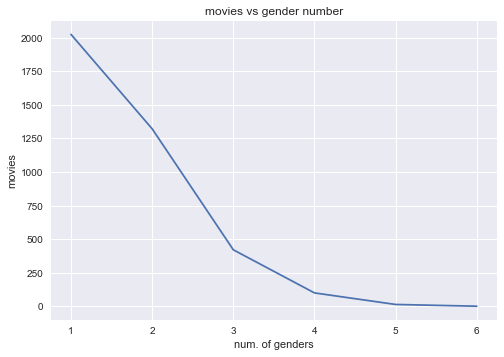

In [111]:
# Plot del número de gèneres per peli

plt.style.use('seaborn')

plt.plot(sum_peli_generes)

plt.title('movies vs gender number')
plt.xlabel('num. of genders')
plt.ylabel('movies')

plt.show()

In [112]:
movies.columns

Index(['movie_id', 'Titulo', 'Año', 'Genero_Animation', 'Genero_Children's',
       'Genero_Comedy', 'Genero_Adventure', 'Genero_Fantasy', 'Genero_Romance',
       'Genero_Drama', 'Genero_Action', 'Genero_Crime', 'Genero_Thriller',
       'Genero_Horror', 'Genero_Sci-Fi', 'Genero_Documentary', 'Genero_War',
       'Genero_Musical', 'Genero_Mystery', 'Genero_Film-Noir',
       'Genero_Western', 'generes_num'],
      dtype='object')

In [113]:
movies

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western,generes_num
0,1,Toy Story,1995.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2,Jumanji,1995.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,Grumpier Old Men,1995.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4,Waiting to Exhale,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5,Father of the Bride Part II,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3879,3949,Requiem for a Dream,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3880,3950,Tigerland,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3881,3951,Two Family House,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
#Creem la variable groupby per anys:
year_grp = movies.groupby(['Año'])

In [115]:
#Comprovem que funciona passant un any en concret:
year_grp.get_group(1922)

,movie_id,Titulo,Año,Genero_Animation,Genero_Children's,Genero_Comedy,Genero_Adventure,Genero_Fantasy,Genero_Romance,Genero_Drama,Genero_Action,Genero_Crime,Genero_Thriller,Genero_Horror,Genero_Sci-Fi,Genero_Documentary,Genero_War,Genero_Musical,Genero_Mystery,Genero_Film-Noir,Genero_Western,generes_num
1327,1348,"Nosferatu (Nosferatu, eine Symphonie des Grauens)",1922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3126,3195,Tess of the Storm Country,1922.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
# Busquem quantes pelis catalogades com a comèdies s'han fet cada any. 
# Fem servir l'agrupació per any seleccionant les comedies i aplicant un value_counts(), alhora ordenem els resultats:

# REVISAR PERQUÈ AL NO PODER POSAR ' > 0' NO SERVEIX EL FILTRE

year_grp = movies.groupby(['Año'])

comedy_years = year_grp['Genero_Comedy'].value_counts().sort_values(ascending=False)
comedy_years

Año     Genero_Comedy
1995.0  0.0              253
1996.0  0.0              230
1998.0  0.0              225
1997.0  0.0              217
1999.0  0.0              180
                        ... 
1923.0  0.0                1
1930.0  1.0                1
1945.0  1.0                1
1921.0  0.0                1
1926.0  1.0                1
Name: Genero_Comedy, Length: 153, dtype: int64

In [117]:
# Busquem quantes pelis catalogades com a comèdies s'han fet cada any. Passem el filtre 'comedy' creat a la columna d'anys:
comedy = movies.loc[filt_comedy]['Año']
comedy

0       1995.0
2       1995.0
3       1995.0
4       1995.0
6       1995.0
         ...  
3858    1948.0
3859    1940.0
3873    2000.0
3874    2000.0
3878    2000.0
Name: Año, Length: 1200, dtype: float64

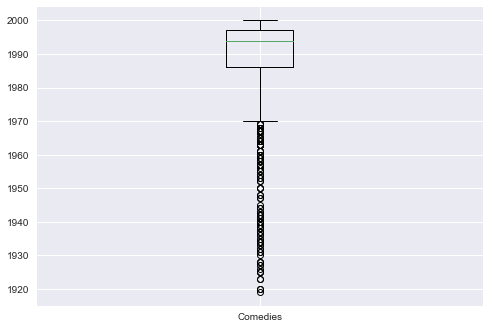

In [118]:
# Fem el primer boxplot de comèdies. Agafa cada pel·lícula que és comèdia i l'any en que es va fer 
# i les divideix en quartils i outliers.

comedy = movies.loc[filt_comedy]['Año']

labels = ['Comedies']

plt.boxplot(comedy, labels = labels)

plt.show()

# Observem que la majoria de comèdies (1,2,3 i 4 quartils), es situen entre el 1970 i el 2000. 
# Comparant amb el boxplot de producció general la distribució dels quartils no varia massa, es redueix dels 70 als 2000,
# indicant un increment de comèdies aquestes dècades tenint en compte la proporció en l'augemtn de la producció.

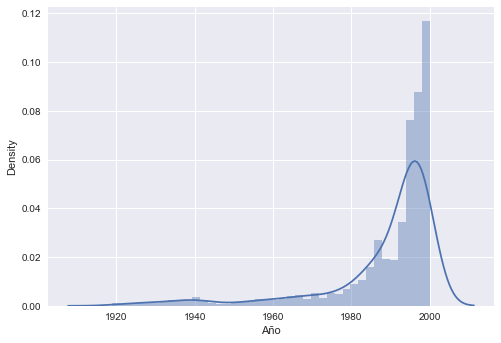

In [119]:
# Agafant les mateixes dades fem un distplot:

comedy = movies.loc[filt_comedy]['Año']

labels = ['Comedies']

sns.distplot(comedy)

plt.show()

In [120]:
# Fem servir el filtre anterior i li apliquem un value_counts(), que ens retorna el número de comèdies per any.
comedy = movies.loc[filt_comedy]['Año']
comedy = comedy.value_counts()
comedy

1996.0    115
1998.0    112
1999.0    103
1997.0     98
1994.0     96
1995.0     89
2000.0     69
1993.0     47
1992.0     37
1986.0     37
1987.0     29
1991.0     24
1989.0     24
1988.0     23
1990.0     22
1985.0     22
1984.0     17
1983.0     14
1980.0     13
1982.0     12
1979.0     10
1967.0     10
1981.0      9
1971.0      7
1963.0      7
1978.0      7
1977.0      7
1974.0      7
1975.0      6
1940.0      6
1957.0      6
1970.0      6
1965.0      6
1976.0      5
1973.0      5
1964.0      4
1942.0      4
1934.0      4
1969.0      4
1968.0      3
1972.0      3
1938.0      3
1958.0      3
1960.0      3
1950.0      3
1959.0      3
1937.0      3
1928.0      3
1961.0      3
1955.0      3
1941.0      3
1925.0      3
1939.0      2
1931.0      2
1923.0      2
1954.0      2
1944.0      2
1935.0      2
1933.0      2
1953.0      2
1932.0      2
1920.0      2
1952.0      2
1948.0      2
1943.0      2
1936.0      2
1947.0      2
1927.0      2
1945.0      1
1926.0      1
1966.0      1
1919.0

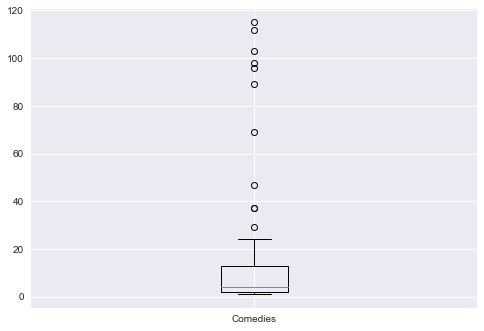

In [121]:
# Fem el segon boxplot de comèdies amb el filtre modificat:
comedy = movies.loc[filt_comedy]['Año']
comedy = comedy.value_counts()

labels = ['Comedies']

plt.boxplot(comedy, labels = labels)

plt.show()

# Aquí podem observar que la gran majoria d'anys no es superen les 30 comèdies. 
# Ara bé, tenim uns outliers pronunciats, de totes maneres força proporcionats amb el boxplot de producció total per anys.

In [122]:
# Fem el mateix procés amb les pel·lícules d'animació. Agafem el filtre i apliquem value_counts():
animation = movies.loc[filt_anim]['Año']
animation = animation.value_counts()
animation

1998.0    8
1995.0    8
2000.0    8
1999.0    7
1996.0    7
1997.0    6
1994.0    5
1993.0    4
1986.0    3
1988.0    3
1973.0    3
1940.0    3
1981.0    3
1992.0    3
1990.0    2
1991.0    2
1946.0    2
1989.0    2
1977.0    2
1968.0    2
1982.0    2
1978.0    2
1967.0    1
1959.0    1
1953.0    1
1961.0    1
1939.0    1
1941.0    1
1951.0    1
1963.0    1
1947.0    1
1950.0    1
1948.0    1
1942.0    1
1955.0    1
1943.0    1
1985.0    1
1937.0    1
1945.0    1
1970.0    1
Name: Año, dtype: int64

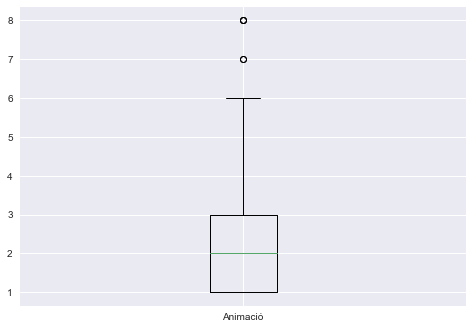

In [123]:
# Comparem el boxplot de comèdies amb el d'animació per any, un gènere molt menys produït.

animation = movies.loc[filt_anim]['Año']
animation = animation.value_counts()

labels = ['Animació']

plt.boxplot(animation, labels = labels)

plt.show()

# La mostra és molt més petita (1200 vs 105). Trobem molts menys outliers i variabilitat. 
# Aixó ens indica un producció del gènere més reduïda i estable al llarg dels anys.

In [124]:
# Agafem també els filtres de misteri i musical. Els apliquem a la columna d'anys:
mistery = movies.loc[filt_mistery]['Año']
musical = movies.loc[filt_musical]['Año']
animation = movies.loc[filt_anim]['Año']

In [125]:
# Busquem la quantitat de pel·lícules de cada un dels tres gèneres:
len(mistery)

106

In [126]:
len(musical)

114

In [127]:
len(animation)

105

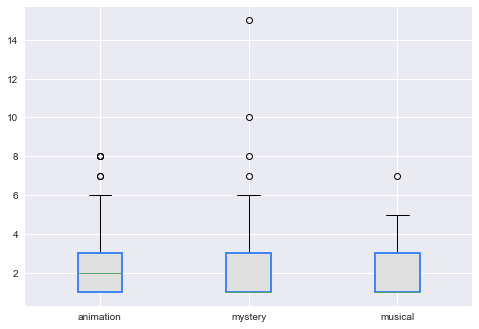

In [128]:
# Fem un boxplot comparatiu entre 3 variables: els gèneres 'animació', 'musical' i 'misteri',
# seleccionats per tenir nombres semblants dins el total. 

mistery = movies.loc[filt_mistery]['Año']
mistery = mistery.value_counts()

musical = movies.loc[filt_musical]['Año']
musical = musical.value_counts()

animation = movies.loc[filt_anim]['Año']
animation = animation.value_counts()

labels=['animation', 'mystery', 'musical']

boxes = plt.boxplot([animation, mistery, musical], labels = labels, patch_artist=True)
for box in boxes['boxes']:
    #Set edge color
    box.set(color='#4286f4', linewidth=2)

    #Change fill color
    box.set(facecolor='#e0e0e0')
    
plt.show()

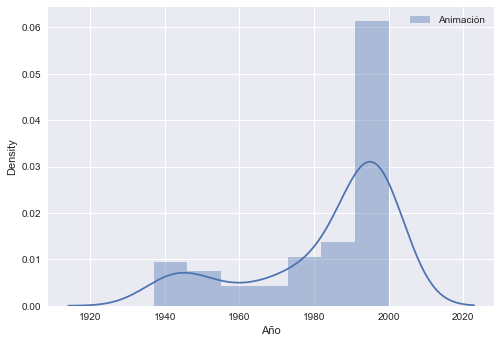

In [129]:
# Volem fer una comparativa entre animació/infantil/comedia, gèneres que solen anar de la mà.
# Comencem mostrant el número de pel·lícules d'animació al llarg dels anys:

animation = movies.loc[filt_anim]['Año']

sns.distplot(animation, label = 'Animación')

plt.legend()
plt.show()

In [130]:
filt_child = movies["Genero_Children's"] > 0
filt_child

0        True
1        True
2       False
3       False
4       False
        ...  
3878    False
3879    False
3880    False
3881    False
3882    False
Name: Genero_Children's, Length: 3883, dtype: bool

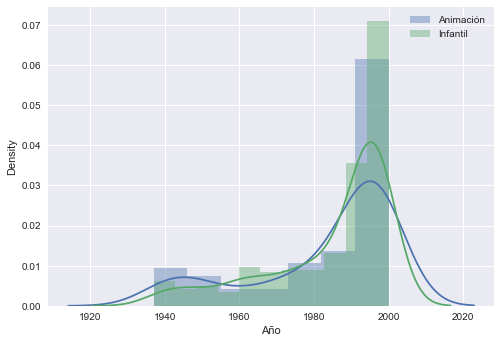

In [131]:
# Comparativa animació/infantil

child = movies.loc[filt_child]['Año']

sns.distplot(animation, label = 'Animación')
sns.distplot(child, label = 'Infantil')

plt.legend()
plt.show()

In [132]:
filt_com = movies["Genero_Comedy"] > 0
filt_com

0        True
1       False
2        True
3        True
4        True
        ...  
3878     True
3879    False
3880    False
3881    False
3882    False
Name: Genero_Comedy, Length: 3883, dtype: bool

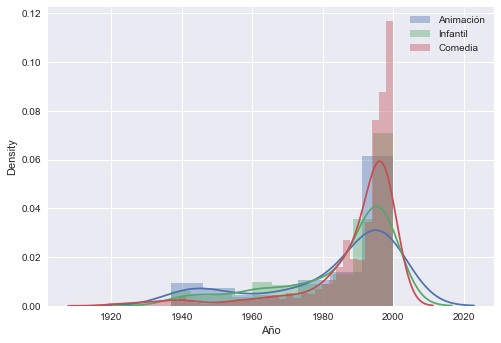

In [133]:
# Comparativa animació/infantil

comedy = movies.loc[filt_com]['Año']

sns.distplot(animation, label = 'Animación')
sns.distplot(child, label = 'Infantil')
sns.distplot(comedy, label = 'Comedia')

plt.legend()
plt.show()